# Logistic Regression - Breast Cancer Dataset

# Step 1: Import Required Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Step 2: Load Dataset

In [7]:
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\project\data.csv")  # Added 'r' prefix to treat as raw string
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Step 3: Data Preprocessing

In [8]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Step 4: Feature Selection and Splitting

In [9]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Step 5: Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Logistic Regression Model

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# Step 8: Predictions

In [13]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC

# Step 9: Evaluation Metrics

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



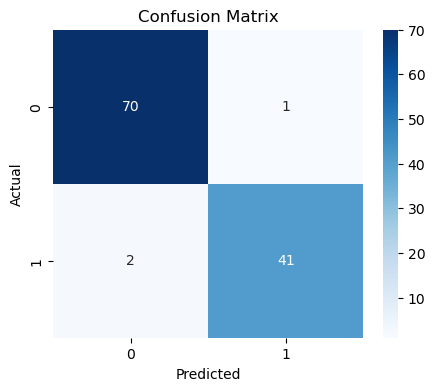

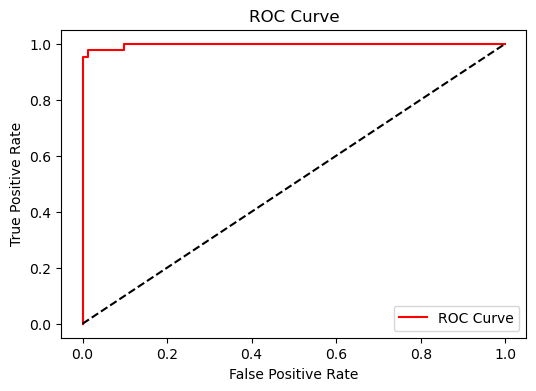

ROC-AUC Score: 0.99737962659679


In [14]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='red', label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


# Step 10: Threshold Tuning

In [15]:
threshold = 0.6
custom_pred = (y_prob >= threshold).astype(int)
print("\nConfusion Matrix with Threshold 0.6:")
print(confusion_matrix(y_test, custom_pred))


Confusion Matrix with Threshold 0.6:
[[71  0]
 [ 2 41]]


# Step 11: Sigmoid Function Visualization

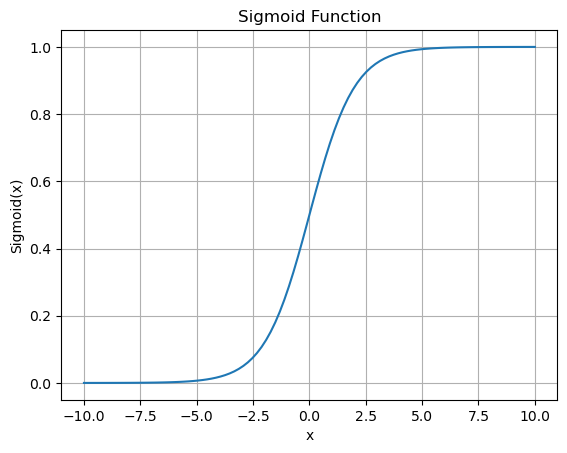

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_vals = np.linspace(-10, 10, 100)
y_vals = sigmoid(x_vals)

plt.plot(x_vals, y_vals)
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.grid(True)
plt.show()